# Python SVM Classifier Example

**(C) 2017-2024 by [Damir Cavar](http://damir.cavar.me/)**

**Download:** This and various other Jupyter notebooks are available from my [GitHub repo](https://github.com/dcavar/python-tutorial-for-ipython).

**Version:** 1.2, January 2024

**License:** [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/))

**Prerequisites:**

In [ ]:
!pip install -U scikit-learn

In [ ]:
!pip install -U matplotlib

In [ ]:
!pip install -U numpy

This is a tutorial related to the discussion of an SVN classifier in the textbook [Machine Learning: The Art and Science of Algorithms that Make Sense of Data](https://www.cs.bris.ac.uk/~flach/mlbook/) by [Peter Flach](https://www.cs.bris.ac.uk/~flach/).

This tutorial was developed as part of my course material for the course Machine Learning for Computational Linguistics in the [Computational Linguistics Program](http://cl.indiana.edu/) of the [Department of Linguistics](http://www.indiana.edu/~lingdept/) at [Indiana University](https://www.indiana.edu/).

## SVN Example using 

The basic idea and storyline for this example was taken from or inspired by [the tutorial Simple Support Vector Machine (SVM) example with character recognition](https://pythonprogramming.net/support-vector-machine-svm-example-tutorial-scikit-learn-python/).

This tutorial requires [Scikit-learn](https://pypi.python.org/pypi/scikit-learn/) and [Matplotlib](http://matplotlib.org). These modules come with the default [Anaconda Python](https://www.continuum.io/downloads) installation.

To start the tutorial and run the example, we will import *pyplot* from *matplotlib*, and *datasets* and *svm* from *scikit-learn*.

In [35]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

We load the digits data set into memory, refering to it with the variable *digits*.

In [36]:
digits = datasets.load_digits()

We can output the data set in *digits*:

In [37]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


The data contains the actual **features**. You will find a brief description of the [digits dataset](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) on the [Scikit-learn website](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). It contains datapoints with 8x8 images of the digits 0 to 9.

We can print out the image of the digits. In this case we are printing the digit 0:

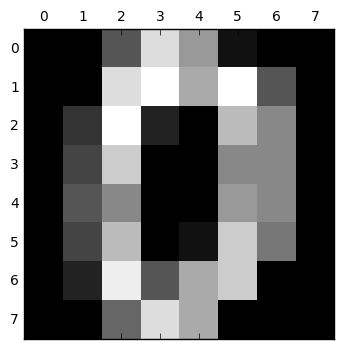

In [38]:
plt.gray()
plt.matshow(digits.images[0])
plt.show()

The *target* vector contains the actual labels of the datapoints.

In [39]:
print(digits.target)

[0 1 2 ..., 8 9 8]


We will use a default classifier from the Scikit-learn module, the [C-Support Vector Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html). The penalty parameter *C* is set to 1.0 in the default. In this example *C* is set to 100. The kernel coeefficient is optional and in this example it is set to 0.001. The meaning and effect of *C* and *gamma* is explained on [the Scikit-learn pages](http://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html).

In [40]:
classifier = svm.SVC(gamma=0.001, C=100)

We can train the classifier now on all datapoints but the last 10. We leave the last 10 datapoints out for testing. The *X* variable contains the coordinates or features, and the *y* variable the targets or labels.

In [41]:
X,y = digits.data[:-10], digits.target[:-10]

We train the classifier on this data:

In [42]:
classifier.fit(X,y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

We can now test the classifier on one of the test datapoints that we left out from the training corpus. Note that newer Scikit-learn modules deprecate the passing of one-dimensional arrays as data, which *digits.data[-5]*. Since *digits.data[-5]* contains a single sample, we need to reshape it using *.reshape(1,-1)*.

In [43]:
print(classifier.predict(digits.data[-5].reshape(1,-1)))

[9]


The *reshape* method converts vectors. For example, imagine we have an array of 10 digits arranged as a 1-dimensional columnar array as in the following example:

In [44]:
import numpy

numpy.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

This array can be converted to an 1-dimensional row array using the *reshape* function:

In [45]:
t = numpy.array([[0],[1],[2],[3],[4],[5],[6],[7],[8],[9]])

print(t.reshape(1,-1))

[[0 1 2 3 4 5 6 7 8 9]]


Alternatively, an 1-dimensional row array can be reshaped to a 1-dimensional columnar array in the following way:

In [46]:
t = t.reshape(1,-1)
print("t as a      row-array:", t)
print("t as a columnar array:", t.reshape((-1,1)))

t as a      row-array: [[0 1 2 3 4 5 6 7 8 9]]
t as a columnar array: [[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]


In the above example the digits data contains a single sample:

In [47]:
print(digits.data[-5])

[  0.   0.   4.  10.  13.   6.   0.   0.   0.   1.  16.  14.  12.  16.   3.
   0.   0.   4.  16.   6.   3.  16.   4.   0.   0.   0.  12.  16.  16.  16.
   5.   0.   0.   0.   0.   4.   4.  16.   8.   0.   0.   0.   0.   0.   0.
  15.   5.   0.   0.   0.   5.   7.   7.  16.   4.   0.   0.   0.   2.  14.
  15.   9.   0.   0.]


The *classifier.predict()* function in the [Scikit-learn module](http://scikit-learn.org/) requires the vector of this one sample to be reshaped to actually an array that contains the entire sample as an element, that is an array with an array that contains the sample data:

In [48]:
print(digits.data[-5].reshape(1,-1))

[[  0.   0.   4.  10.  13.   6.   0.   0.   0.   1.  16.  14.  12.  16.
    3.   0.   0.   4.  16.   6.   3.  16.   4.   0.   0.   0.  12.  16.
   16.  16.   5.   0.   0.   0.   0.   4.   4.  16.   8.   0.   0.   0.
    0.   0.   0.  15.   5.   0.   0.   0.   5.   7.   7.  16.   4.   0.
    0.   0.   2.  14.  15.   9.   0.   0.]]


Returning to our classifier result, let us look at the 5th datapoint in our test data, that is the fifth element from the back (-5) of *digits*, given that we left out the last ten datapoints for testing. We see that the classifier guessed that 5th sample represents a 9:

In [49]:
print(classifier.predict(digits.data[-5].reshape(1,-1)))

[9]


We can print the image and see whether the classifier was right:

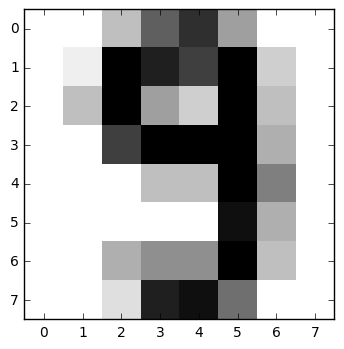

In [50]:
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

(C) 2017-2024 by [Damir Cavar](http://cavar.me/damir/) - [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/) ([CA BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0/)); portions taken from the referenced sources.